# Testing full run of a compiled benchmark on SWIPER-SIM

Sampling decoder latency from PyMatching latency distribution

In [1]:
import os
try:
    path_initialized
except NameError:
    path_initialized = True
    os.chdir('..')

import numpy as np
import datetime as dt
import json
import math
from swiper.lattice_surgery_schedule import LatticeSurgerySchedule
from swiper.schedule_experiments import RegularTSchedule
from swiper.simulator import DecodingSimulator
import swiper.plot as plotter

In [2]:
loaded = LatticeSurgerySchedule.from_str(open('benchmarks/cached_schedules/adder_n18.lss', 'r').read())

In [3]:
generator = np.random.default_rng(2)
decoder_dists = json.load(open('benchmarks/data/decoder_dists.json', 'r'))
decoder_dist = {}
for dist_str, dist_dict in decoder_dists.items():
    if int(dist_str) == 15:
        decoder_dist = {int(k):v for k,v in dist_dict.items()}
decoding_latency_fn = lambda volume: generator.choice(decoder_dist[max(2, math.ceil(volume / 15))])

In [4]:
simulator = DecodingSimulator()
success, _, device_data, window_data, decoding_data = simulator.run(
    schedule=loaded,
    distance=15,
    scheduling_method='aligned',
    decoding_latency_fn=decoding_latency_fn,
    speculation_mode=None,
    speculation_latency=1,
    speculation_accuracy=0.9,
    missed_speculation_modifier=1.4,
    poison_policy='successors',
    max_parallel_processes=None,
    print_interval=dt.timedelta(seconds=10),
    save_animation_frames=False,
    lightweight_setting=0,
    rng=0
)

2025-03-28 09:35:15 | Starting simulation
2025-03-28 09:35:17 | Simulation update: decoder round 1, completed instructions: 0/2338, actively running or decoding instructions: 3, waiting windows: 0/0. Max active instruction index: 18
2025-03-28 09:35:27 | Simulation update: decoder round 5738, completed instructions: 1226/2338, actively running or decoding instructions: 7, waiting windows: 3667/7864. Max active instruction index: 1251
2025-03-28 09:35:31 | Finished simulation


In [5]:
device_data.num_rounds, decoding_data.max_parallel_decoders

(11445, 75)

<Axes3D: >

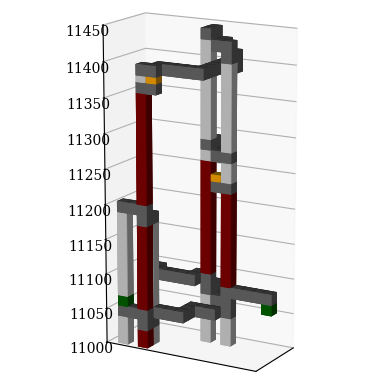

In [6]:
# plotter.plot_device_schedule_trace(device_data, hide_z_ticks=True, z_min=500,
# z_max=600)
plotter.plot_device_schedule_trace(device_data, z_min=11000, z_max=11500)

In [7]:
decoding_data.num_rounds

11630

In [8]:
device_data.generated_syndrome_data[-1]

[SyndromeRound((6, 6), r=11444, instr=2318, init=False, discard=True),
 SyndromeRound((6, 5), r=11444, instr=2318, init=False, discard=True)]